<a href="https://colab.research.google.com/github/MaximeDubost/Dogs_Images_Classification/blob/master/Dogs_Images_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Machine Learning - Classification de races de chien

Préparation et imports

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

Chemin vers les données

In [ ]:
path = untar_data(URLs.IMAGEWOOF)

Utilisation des noms des fichiers pour les catégories

In [ ]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(224, min_scale=0.5),
   batch_tfms=aug_transforms())

Affichage des 10 catégories

In [ ]:
dls = fields.dataloaders(path)
dls.vocab

['n02086240', 'n02087394', 'n02088364', 'n02089973', 'n02093754', 'n02096294', 'n02099601', 'n02105641', 'n02111889', 'n02115641']

Extrait des images

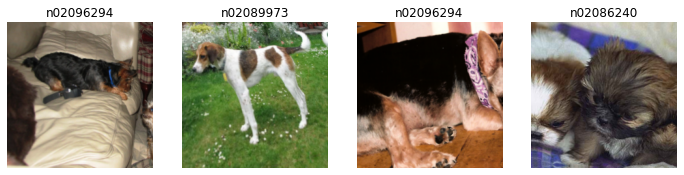

In [ ]:
dls.train.show_batch(max_n=4, nrows=1)

Phase de data augmentation

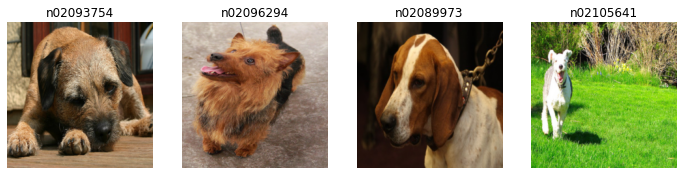

In [ ]:
fields = fields.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls.valid.show_batch(max_n=4, nrows=1)

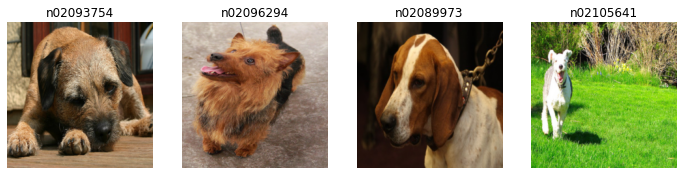

In [ ]:
fields = fields.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls.valid.show_batch(max_n=4, nrows=1)

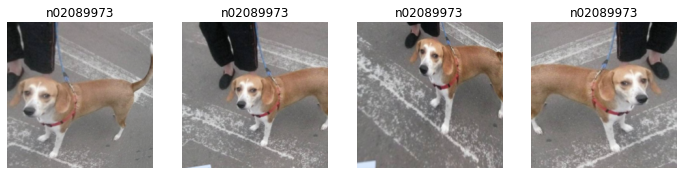

In [ ]:
fields = fields.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls.train.show_batch(max_n=4, nrows=1, unique=True)

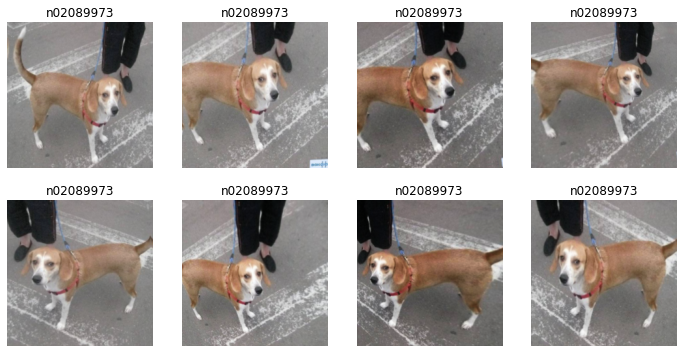

In [ ]:
fields = fields.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Apprentissage du model

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.489322,0.236255,0.064479,03:04


epoch,train_loss,valid_loss,error_rate,time
0,0.343295,0.247838,0.074517,04:10
1,0.256031,0.193708,0.055598,04:10
2,0.148910,0.171161,0.049421,04:10


Matrice de confusion :

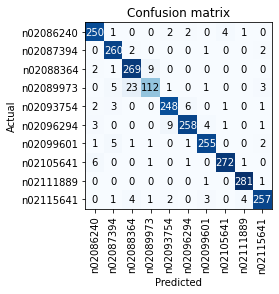

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Export du model

In [ ]:
learn.export(fname='gdrive/MyDrive/model.pkl')
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner('gdrive/MyDrive/model.pkl')

Le modèle est accessible ici : https://drive.google.com/file/d/1Zh4SnTWRhdaDXMYpl0ZaLPRJakWr0fMR/view?usp=sharing

Création du bouton permettant d'upload une image

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Récupération et affichage de l'image

In [ ]:
img = PILImage.create(uploader.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Prédiction de la race de chien à partir de l'image

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: n02086240; Probability: 1.0000')

Tableau de correspondance entre les id (issus des noms de dossiers où se trouvent les images de chaque race) et les noms :


| Id | Name |
| --- | --- |
| n02086240 | Shih-Tzu |
| n02087394 | Rhodesian ridgeback |
| n02088364 | Beagle |
| n02089973 | English foxhound |
| n02093754 | Border terrier |
| n02096294 | Australian terrier |
| n02099601 | Golden retriever |
| n02105641 | Old English sheepdog |
| n02111889 | Samoyed |
| n02115641 | Dingo |